<a href="https://colab.research.google.com/github/navgaur/QM1_UGCF/blob/main/Unit_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Solve the s-wave Schrodinger Equation**

Schrodinger Equation
$$ \left[-\frac{\hbar^2}{2 m} \nabla^2 + V(r) \right] \psi (\vec{r}) = E \psi(\vec{r}) $$

FOr spherically symmetric potentials $\psi(\hat{r}) = \psi(r)$ and we will only have radial equation:
$$ -\frac{\hbar^2}{2 m} \left( \frac{d^2}{dr^2} + \frac{2}{r} \frac{d}{dr} \right)  \psi (r) = E \psi(r) $$
Further introducing $u(r) = r \psi(r)$:
$$ -\frac{\hbar^2}{2 m} \frac{d^2 u(r)}{dr^2} + V(r)\ u(r) = E \ u(r) $$
This is the **s-wave** Schrodinger equation corresponding to $l = 0$ *i.e.* no angular dependence in the wavefunction.

Ground state energy: -17780.40774 a.u.
First excited state energy: -17780.18625 a.u.


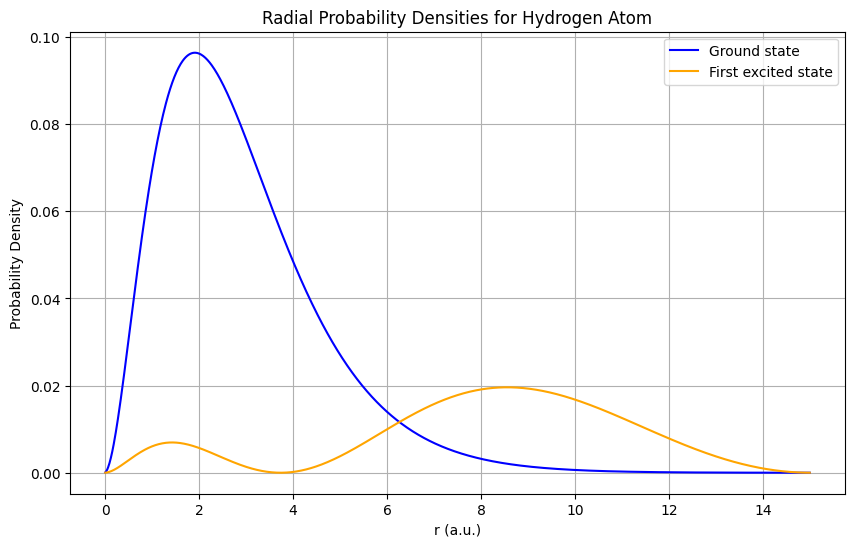

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Constants
N = 1000  # Number of grid points
r_min = 1e-3  # Avoid singularity at r = 0
r_max = 15  # Maximum radius to consider (in atomic units)
dr = (r_max - r_min) / N  # Step size in r

# Radial grid
r = np.linspace(r_min, r_max, N)

# Potential energy (Coulomb potential for hydrogen atom)
V = - 1/r  # Coulomb potential V(r) = -1 / r

# Kinetic energy operator: second derivative approximation
# We will create the tridiagonal matrix for the Hamiltonian
diag = np.zeros(N)  # Diagonal elements of the Hamiltonian
off_diag = np.zeros(N - 1)  # Off-diagonal elements

# Fill the diagonal and off-diagonal elements
for i in range(N):
    diag[i] = -2.0 / dr**2 + V[i]  # -2 on the diagonal plus potential term
for i in range(N - 1):
    off_diag[i] = 1.0 / dr**2  # 1 / dr^2 on the off-diagonal

# Solve the eigenvalue problem for the lowest eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh_tridiagonal(diag, off_diag)

# Get the ground state and first excited state energies and wavefunctions
ground_state_energy = eigenvalues[0]
first_excited_state_energy = eigenvalues[1]
ground_state_wavefunction = eigenvectors[:, 0]
first_excited_state_wavefunction = eigenvectors[:, 1]

# Normalize the wavefunctions
def normalize(wavefunction, r):
    norm = np.sqrt(np.sum(wavefunction**2 * r) * dr)
    return wavefunction / norm

ground_state_wavefunction = normalize(ground_state_wavefunction, r)
first_excited_state_wavefunction = normalize(first_excited_state_wavefunction, r)

# Print the energies
print(f"Ground state energy: {ground_state_energy:.5f} a.u.")
print(f"First excited state energy: {first_excited_state_energy:.5f} a.u.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r, ground_state_wavefunction**2, label="Ground state", color='blue')
plt.plot(r, first_excited_state_wavefunction**2, label="First excited state", color='orange')
plt.title('Radial Probability Densities for Hydrogen Atom')
plt.xlabel('r (a.u.)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()
